Подключение библиотек

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
import pickle
import seaborn as sns

Пути к директориям и файлам

In [281]:
 # Data files
Train = r"C:\Users\805903\project\train.csv"
Test = r"C:\Users\805903\project\test.csv"

Загрузка данных
Описание датасета

Описание датасета:
-Id - идентификационный номер квартиры
-DistrictId - идентификационный номер района
-Rooms - количество комнат
-Square - площадь
-LifeSquare - жилая площадь
-KitchenSquare - площадь кухни
-Floor - этаж
-HouseFloor - количество этажей в доме
-HouseYear - год постройки дома
-Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
-Social_1, Social_2, Social_3 - социальные показатели местности
-Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
-Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
-Price - цена квартиры

Считывание датасета


In [282]:
df=pd.read_csv(Train, index_col='Id')
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
14038          35    2.0  47.981561   29.442751            6.0      7   
15053          41    3.0  65.683640   40.049543            8.0      7   
4765           53    2.0  44.947953   29.197612            0.0      8   
5809           58    2.0  53.352981   52.731512            9.0      8   
10783          99    1.0  39.649192   23.776169            7.0     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
14038         9.0       1969   0.089040         B         B        33   
15053         9.0       1978   0.000070         B         B        46   
4765         12.0       1968   0.049637         B         B        34   
5809         17.0       1977   0.437885         B         B        23   
10783        12.0       1976   0.012339         B         B        35   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
14038      7976         5           NaN            0       11       B   
15053     10309         1         240.0            1       16       B   
4765       7759         0         229.0            1        3       B   
5809       5735         3        1084.0            0        5       B   
10783      5776         1        2078.0            2        4       B   

               Price  
Id                    
14038  184966.930730  
15053  300009.450063  
4765   220925.908524  
5809   175616.227217  
10783  150226.531644

In [283]:
dt=pd.read_csv(Test,index_col='Id')
dt.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
725            58    2.0  49.882643   33.432782            6.0      6   
15856          74    2.0  69.263183         NaN            1.0      6   
5480          190    1.0  13.597819   15.948246           12.0      2   
15664          47    2.0  73.046609   51.940842            9.0     22   
14275          27    1.0  47.527111   43.387569            1.0     17   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
725          14.0       1972   0.310199         B         B        11   
15856         1.0       1977   0.075779         B         B         6   
5480          5.0       1909   0.000000         B         B        30   
15664        22.0       2007   0.101872         B         B        23   
14275        17.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
Id                                                                     
725        2748         1           NaN            0        0       B  
15856      1437         3           NaN            0        2       B  
5480       7538        87        4702.0            5        5       B  
15664      4583         3           NaN            3        3       B  
14275       629         1           NaN            0        0       A

In [284]:
df.shape,dt.shape

((10000, 19), (5000, 18))

Получение информации о данных

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [286]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [287]:
df.dtypes, dt.dtypes

(DistrictId         int64
 Rooms            float64
 Square           float64
 LifeSquare       float64
 KitchenSquare    float64
 Floor              int64
 HouseFloor       float64
 HouseYear          int64
 Ecology_1        float64
 Ecology_2         object
 Ecology_3         object
 Social_1           int64
 Social_2           int64
 Social_3           int64
 Healthcare_1     float64
 Helthcare_2        int64
 Shops_1            int64
 Shops_2           object
 Price            float64
 dtype: object,
 DistrictId         int64
 Rooms            float64
 Square           float64
 LifeSquare       float64
 KitchenSquare    float64
 Floor              int64
 HouseFloor       float64
 HouseYear          int64
 Ecology_1        float64
 Ecology_2         object
 Ecology_3         object
 Social_1           int64
 Social_2           int64
 Social_3           int64
 Healthcare_1     float64
 Helthcare_2        int64
 Shops_1            int64
 Shops_2           object
 dtype: object)

In [288]:
df.describe()

DistrictId         Rooms        Square   LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  7887.000000   10000.000000   
mean      50.400800      1.890500     56.315775    37.199645       6.273300   
std       43.587592      0.839512     21.058732    86.241209      28.560917   
min        0.000000      0.000000      1.136859     0.370619       0.000000   
25%       20.000000      1.000000     41.774881    22.769832       1.000000   
50%       36.000000      2.000000     52.513310    32.781260       6.000000   
75%       75.000000      2.000000     65.900625    45.128803       9.000000   
max      209.000000     19.000000    641.065193  7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       8.526700     12.609400  3.990166e+03      0.118858     24.687000   
std        5.241148      6.775974  2.005003e+05      0.119025     17.532614   
min        1.000000      0.000000  1.910000e+03      0.000000      0.000000   
25%        4.000000      9.000000  1.974000e+03      0.017647      6.000000   
50%        7.000000     13.000000  1.977000e+03      0.075424     25.000000   
75%       12.000000     17.000000  2.001000e+03      0.195781     36.000000   
max       42.000000    117.000000  2.005201e+07      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000   5202.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1142.904460      1.319500      4.231300   
std     4006.799803     23.831875   1021.517264      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    350.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000   1548.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

In [289]:
dt.describe()

DistrictId        Rooms       Square   LifeSquare  KitchenSquare  \
count  5000.000000  5000.000000  5000.000000  3959.000000    5000.000000   
mean     51.279200     1.910000    56.449500    36.158810       5.976800   
std      44.179466     0.838594    19.092787    17.825287       9.950018   
min       0.000000     0.000000     1.378543     0.333490       0.000000   
25%      21.000000     1.000000    41.906231    23.092026       1.000000   
50%      37.000000     2.000000    52.921340    32.925087       6.000000   
75%      77.000000     2.000000    66.285129    45.174091       9.000000   
max     212.000000    17.000000   223.453689   303.071094     620.000000   

             Floor   HouseFloor    HouseYear    Ecology_1     Social_1  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      8.632000    12.601000  1984.392600     0.119874    24.933800   
std       5.483228     6.789213    18.573149     0.120070    17.532202   
min       1.000000     0.000000  1908.000000     0.000000     0.000000   
25%       4.000000     9.000000  1973.000000     0.019509     6.000000   
50%       7.000000    12.000000  1977.000000     0.072158    25.000000   
75%      12.000000    17.000000  2000.000000     0.195781    36.000000   
max      78.000000    99.000000  2020.000000     0.521867    74.000000   

           Social_2     Social_3  Healthcare_1  Helthcare_2      Shops_1  
count   5000.000000  5000.000000   2623.000000   5000.00000  5000.000000  
mean    5406.900000     8.262600   1146.657263      1.31940     4.242800  
std     4026.614773    23.863762   1044.744231      1.47994     4.777365  
min      168.000000     0.000000      0.000000      0.00000     0.000000  
25%     1564.000000     0.000000    325.000000      0.00000     1.000000  
50%     5285.000000     2.000000    900.000000      1.00000     3.000000  
75%     7287.000000     5.000000   1548.000000      2.00000     6.000000  
max    19083.000000   141.000000   4849.000000      6.00000    23.000000

In [290]:
#df['DistrictId']=df['DistrictId'].astype(str)
#dt['DistrictId']=dt['DistrictId'].astype(str)

Информация о целевой переменной

Text(0.5, 0, 'Price')

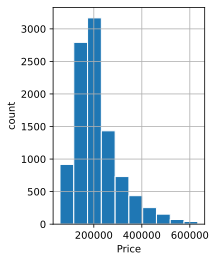

In [291]:
plt.subplot(121)
df['Price'].hist(edgecolor='white')
plt.ylabel('count')
plt.xlabel('Price')

In [292]:
feature_names=df.drop("Price", axis=1).select_dtypes(include=['float64','int64']).columns.tolist()
feature_names

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005241A1A6A0>,
      dtype=object)

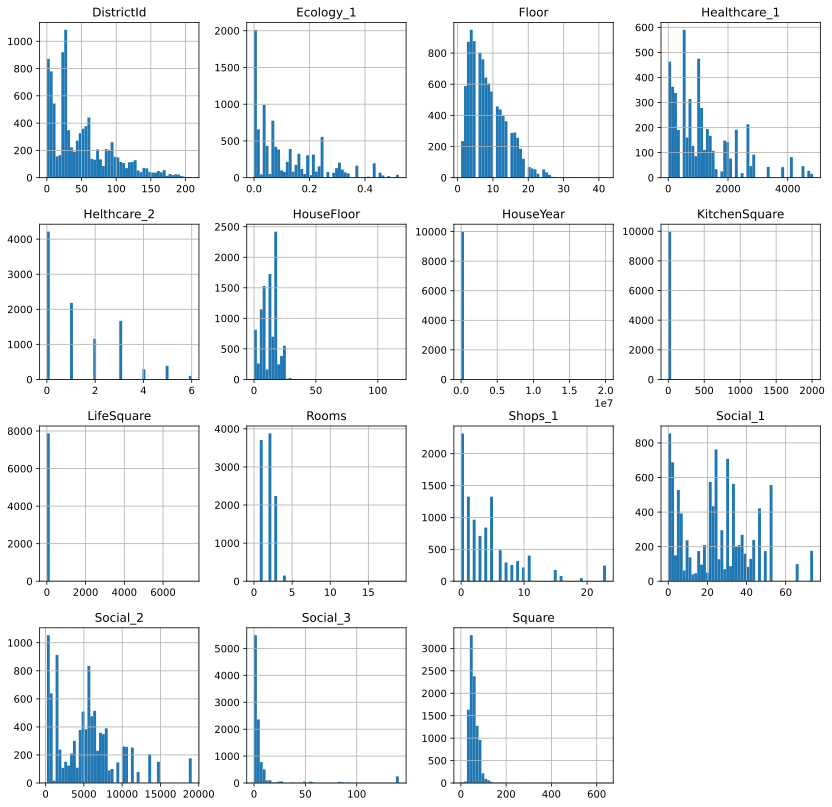

In [293]:
df[feature_names].hist(figsize=(14,14), bins=50,grid=True)

Категориальные переменные

In [294]:
df.describe(include='object')

Ecology_2 Ecology_3 Shops_2
count      10000     10000   10000
unique         2         2       2
top            B         B       B
freq        9903      9725    9175

In [295]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [296]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [297]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [298]:
Ec2=pd.get_dummies(df['Ecology_2'])
Ec2

A  B
Id         
14038  0  1
15053  0  1
4765   0  1
5809   0  1
10783  0  1
...   .. ..
77     0  1
6159   0  1
5123   0  1
5400   0  1
6306   0  1

[10000 rows x 2 columns]

In [299]:
Ec3=pd.get_dummies(df['Ecology_3'])
Ec3

A  B
Id         
14038  0  1
15053  0  1
4765   0  1
5809   0  1
10783  0  1
...   .. ..
77     0  1
6159   0  1
5123   0  1
5400   1  0
6306   0  1

[10000 rows x 2 columns]

In [300]:
Sh2=pd.get_dummies(df['Shops_2'])
Sh2

A  B
Id         
14038  0  1
15053  0  1
4765   0  1
5809   0  1
10783  0  1
...   .. ..
77     0  1
6159   1  0
5123   1  0
5400   0  1
6306   0  1

[10000 rows x 2 columns]

In [301]:
df=pd.concat([df,Ec2,Ec3,Sh2], axis=1)
df

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
14038          35    2.0  47.981561   29.442751            6.0      7   
15053          41    3.0  65.683640   40.049543            8.0      7   
4765           53    2.0  44.947953   29.197612            0.0      8   
5809           58    2.0  53.352981   52.731512            9.0      8   
10783          99    1.0  39.649192   23.776169            7.0     11   
...           ...    ...        ...         ...            ...    ...   
77             32    2.0  50.401785   30.476203            5.0      6   
6159           18    1.0  41.521546   20.539216            9.0     13   
5123           27    1.0  47.939008         NaN            1.0     12   
5400           75    2.0  43.602562   33.840147            8.0      1   
6306          128    1.0  38.666645   21.157874            8.0      7   

       HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Helthcare_2  Shops_1  \
Id                                                 ...                        
14038         9.0       1969   0.089040         B  ...           0       11   
15053         9.0       1978   0.000070         B  ...           1       16   
4765         12.0       1968   0.049637         B  ...           1        3   
5809         17.0       1977   0.437885         B  ...           0        5   
10783        12.0       1976   0.012339         B  ...           2        4   
...           ...        ...        ...       ...  ...         ...      ...   
77            5.0       1968   0.135650         B  ...           3       11   
6159         13.0       2000   0.000000         B  ...           0        5   
5123         16.0       2015   0.072158         B  ...           0        0   
5400          5.0       1961   0.307467         B  ...           2        5   
6306         17.0       1990   0.000000         B  ...           2        8   

       Shops_2          Price  A  B  A  B  A  B  
Id                                               
14038        B  184966.930730  0  1  0  1  0  1  
15053        B  300009.450063  0  1  0  1  0  1  
4765         B  220925.908524  0  1  0  1  0  1  
5809         B  175616.227217  0  1  0  1  0  1  
10783        B  150226.531644  0  1  0  1  0  1  
...        ...            ... .. .. .. .. .. ..  
77           B  196684.316040  0  1  0  1  0  1  
6159         A  189050.289571  0  1  0  1  1  0  
5123         A  159143.805370  0  1  0  1  1  0  
5400         B  181595.339808  0  1  1  0  0  1  
6306         B  218714.077615  0  1  0  1  0  1  

[10000 rows x 25 columns]

In [302]:
Ec2=pd.get_dummies(dt['Ecology_2'])
Ec2

A  B
Id         
725    0  1
15856  0  1
5480   0  1
15664  0  1
14275  0  1
...   .. ..
8180   0  1
4695   0  1
5783   0  1
4780   0  1
12504  0  1

[5000 rows x 2 columns]

In [303]:
Ec3=pd.get_dummies(dt['Ecology_3'])
Ec3

A  B
Id         
725    0  1
15856  0  1
5480   0  1
15664  0  1
14275  0  1
...   .. ..
8180   0  1
4695   0  1
5783   0  1
4780   0  1
12504  0  1

[5000 rows x 2 columns]

In [304]:
Sh2=pd.get_dummies(dt['Shops_2'])
Sh2

A  B
Id         
725    0  1
15856  0  1
5480   0  1
15664  0  1
14275  1  0
...   .. ..
8180   0  1
4695   0  1
5783   0  1
4780   1  0
12504  0  1

[5000 rows x 2 columns]

In [305]:
dt=pd.concat([dt,Ec2,Ec3,Sh2], axis=1)
dt

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
725            58    2.0  49.882643   33.432782            6.0      6   
15856          74    2.0  69.263183         NaN            1.0      6   
5480          190    1.0  13.597819   15.948246           12.0      2   
15664          47    2.0  73.046609   51.940842            9.0     22   
14275          27    1.0  47.527111   43.387569            1.0     17   
...           ...    ...        ...         ...            ...    ...   
8180           11    3.0  67.133911   50.809797            6.0      5   
4695            1    1.0  40.198472   21.807061           10.0     12   
5783           12    3.0  77.842178   48.282625            9.0     23   
4780           62    2.0  81.305222         NaN            0.0      4   
12504          30    2.0  60.555693         NaN            1.0     10   

       HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Healthcare_1  \
Id                                                 ...                
725          14.0       1972   0.310199         B  ...          NaN   
15856         1.0       1977   0.075779         B  ...          NaN   
5480          5.0       1909   0.000000         B  ...       4702.0   
15664        22.0       2007   0.101872         B  ...          NaN   
14275        17.0       2017   0.072158         B  ...          NaN   
...           ...        ...        ...       ...  ...          ...   
8180          9.0       1973   0.000170         B  ...          NaN   
4695         17.0       2017   0.007122         B  ...          NaN   
5783         22.0       1989   0.090799         B  ...          NaN   
4780          0.0       1977   0.072158         B  ...          NaN   
12504        17.0       1977   0.000078         B  ...       1046.0   

       Helthcare_2  Shops_1  Shops_2  A  B  A  B  A  B  
Id                                                      
725              0        0        B  0  1  0  1  0  1  
15856            0        2        B  0  1  0  1  0  1  
5480             5        5        B  0  1  0  1  0  1  
15664            3        3        B  0  1  0  1  0  1  
14275            0        0        A  0  1  0  1  1  0  
...            ...      ...      ... .. .. .. .. .. ..  
8180             1        1        B  0  1  0  1  0  1  
4695             0        1        B  0  1  0  1  0  1  
5783             5       15        B  0  1  0  1  0  1  
4780             0        0        A  0  1  0  1  1  0  
12504            3       23        B  0  1  0  1  0  1  

[5000 rows x 24 columns]

Количественные переменные

Обработка пропусков

Определяем кол-во пропусков

In [306]:
len(df)-df.count()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
A                   0
B                   0
A                   0
B                   0
A                   0
B                   0
dtype: int64

In [307]:
round((len(df)-df.count())*100/df.shape[0],1)

DistrictId        0.0
Rooms             0.0
Square            0.0
LifeSquare       21.1
KitchenSquare     0.0
Floor             0.0
HouseFloor        0.0
HouseYear         0.0
Ecology_1         0.0
Ecology_2         0.0
Ecology_3         0.0
Social_1          0.0
Social_2          0.0
Social_3          0.0
Healthcare_1     48.0
Helthcare_2       0.0
Shops_1           0.0
Shops_2           0.0
Price             0.0
A                 0.0
B                 0.0
A                 0.0
B                 0.0
A                 0.0
B                 0.0
dtype: float64

Заполним пропущенные значения в столбце LifeSquare значениями медианы

In [308]:
df['LifeSquare']=df['LifeSquare'].fillna(df['LifeSquare'].median())

In [309]:

#df.drop('LifeSquare',axis=1, inplace=True)
df.shape, dt.shape

((10000, 25), (5000, 24))

In [310]:
dt['LifeSquare']=dt['LifeSquare'].fillna(dt['LifeSquare'].median())
dt['LifeSquare'].describe()

count    5000.000000
mean       35.485549
std        15.915345
min         0.333490
25%        25.850152
50%        32.925087
75%        41.769526
max       303.071094
Name: LifeSquare, dtype: float64

In [311]:
 df.drop('Healthcare_1', axis=1, inplace=True) 

In [312]:
 dt.drop('Healthcare_1', axis=1, inplace=True)

In [313]:
len(df)-df.count()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
A                0
B                0
A                0
B                0
A                0
B                0
dtype: int64

Обработка выбросов в поле HouseYear

In [314]:
df['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [315]:
dt['HouseYear'].value_counts()

1977    1298
2016     172
2015     159
2017     141
1970     111
        ... 
1910       1
1950       1
1934       1
1909       1
1908       1
Name: HouseYear, Length: 97, dtype: int64

In [316]:
#df.loc[(df['HouseYear']>2020 | df['HouseYear']<1908),'HouseYear']=2011
df.loc[(df['HouseYear']>2020) | (df['HouseYear']<1908), 'HouseYear']=df['HouseYear'].median()
#df[['HouseYear']>2020 | df['HouseYear']<1908]=(df['HouseYear'].median(), inplace=True)
df['HouseYear'].value_counts()

1977.0    2654
2017.0     308
2016.0     305
2015.0     299
2014.0     210
          ... 
1914.0       1
1947.0       1
1916.0       1
1910.0       1
1928.0       1
Name: HouseYear, Length: 95, dtype: int64

Для обработки выбросов принимаем общая площадь не может быть меньше площади кухни и общая площадь не может быть меньше жилой площади

In [317]:
df.loc[(df['Square']<df['LifeSquare']), 'Square']=df['Square'].median()
df.loc[(df['Square']<df['LifeSquare']), 'LifeSquare']=df['LifeSquare'].median()
df.loc[(df['Square']<df['KitchenSquare']), 'KitchenSquare']=df['KitchenSquare'].median()


In [318]:
dt.loc[(dt['Square']<dt['LifeSquare']), 'Square']=dt['Square'].median()
dt.loc[(dt['Square']<dt['LifeSquare']), 'LifeSquare']=dt['LifeSquare'].median()
dt.loc[(dt['Square']<dt['KitchenSquare']), 'KitchenSquare']=dt['KitchenSquare'].median()

In [319]:
df.shape, dt.shape

((10000, 24), (5000, 23))

In [320]:
df[['Square','LifeSquare','KitchenSquare']].median()
df[['Square','KitchenSquare']].median()
dt[['Square','LifeSquare','KitchenSquare']].median()
dt[['Square','KitchenSquare']].median()


Square           52.92134
KitchenSquare     6.00000
dtype: float64

In [321]:
df[['Square','LifeSquare','KitchenSquare']].mean()
df[['Square','KitchenSquare']].mean()
dt[['Square','LifeSquare','KitchenSquare']].mean()
dt[['Square','KitchenSquare']].mean()


Square           56.238993
KitchenSquare     5.791400
dtype: float64

In [322]:
df[['Square','KitchenSquare']].max()
dt[['Square','KitchenSquare']].max()

Square           223.453689
KitchenSquare     65.000000
dtype: float64

In [323]:
df.cov()

DistrictId         Rooms         Square     LifeSquare  \
DistrictId     1.899878e+03      2.613849     -27.900283      -9.076970   
Rooms          2.613849e+00      0.704780      11.029418       6.260533   
Square        -2.790028e+01     11.029418     400.119422     205.821005   
LifeSquare    -9.076970e+00      6.260533     205.821005     231.560922   
KitchenSquare  4.229912e+01      0.466000      10.381315       7.714815   
Floor         -2.749915e+01     -0.002927      12.671668       5.557949   
HouseFloor    -4.402185e+01     -0.166687      12.101852       7.865315   
HouseYear     -1.614476e+02     -0.596674      62.996488      38.122709   
Ecology_1      3.387471e-01     -0.003232      -0.150862      -0.073964   
Social_1       1.883481e+02      1.118338     -25.260701     -14.736087   
Social_2       2.924961e+04    239.954731   -3471.310739   -2303.119581   
Social_3       1.413715e+02      0.256318      16.342547      18.356621   
Helthcare_2    1.993094e+01      0.079693      -0.813112      -0.478963   
Shops_1        3.649734e+01      0.216349       1.882216       2.223418   
Price          1.073148e+06  42904.734888  958403.435604  504764.135888   
A              3.990521e-01      0.000162      -0.059715      -0.023702   
B             -3.990521e-01     -0.000162       0.059715       0.023702   
A              1.988979e-01      0.000811      -0.069264      -0.026751   
B             -1.988979e-01     -0.000811       0.069264       0.026751   
A              2.520592e-01      0.000034       0.252744       0.030902   
B             -2.520592e-01     -0.000034      -0.252744      -0.030902   

               KitchenSquare         Floor    HouseFloor     HouseYear  \
DistrictId         42.299121    -27.499151    -44.021850   -161.447556   
Rooms               0.466000     -0.002927     -0.166687     -0.596674   
Square             10.381315     12.671668     12.101852     62.996488   
LifeSquare          7.714815      5.557949      7.865315     38.122709   
KitchenSquare      23.291966     -0.432417      4.605441     14.740651   
Floor              -0.432417     27.469634     14.879817     27.447281   
HouseFloor          4.605441     14.879817     45.913823     49.027303   
HouseYear          14.740651     27.447281     49.027303    338.927342   
Ecology_1           0.013587     -0.010064     -0.003518     -0.145583   
Social_1           25.673267     -4.127156     -2.471205    -15.480879   
Social_2         5363.891887   -347.754478    195.304011   1004.863524   
Social_3           -7.028378     -0.279375     -1.314020    -21.668928   
Helthcare_2         1.201486     -0.513032     -0.695573     -3.201504   
Shops_1             2.021112      0.611235      0.855831     -0.191316   
Price          117940.091239  62653.128595  55554.483493  62533.559081   
A                   0.003490     -0.025512     -0.039415     -0.138593   
B                  -0.003490      0.025512      0.039415      0.138593   
A                   0.049012     -0.022086     -0.010260     -0.141969   
B                  -0.049012      0.022086      0.010260      0.141969   
A                  -0.028681      0.019649     -0.095085      0.298166   
B                   0.028681     -0.019649      0.095085     -0.298166   

                Ecology_1       Social_1  ...       Social_3   Helthcare_2  \
DistrictId       0.338747     188.348085  ...     141.371526     19.930937   
Rooms           -0.003232       1.118338  ...       0.256318      0.079693   
Square          -0.150862     -25.260701  ...      16.342547     -0.813112   
LifeSquare      -0.073964     -14.736087  ...      18.356621     -0.478963   
KitchenSquare    0.013587      25.673267  ...      -7.028378      1.201486   
Floor           -0.010064      -4.127156  ...      -0.279375     -0.513032   
HouseFloor      -0.003518      -2.471205  ...      -1.314020     -0.695573   
HouseYear       -0.145583     -15.480879  ...     -21.668928     -3.201504   
Ecology_1        0.014167       0.0

In [324]:
df.corr()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare  \
DistrictId       1.000000  0.071432 -0.032000   -0.013685       0.201078   
Rooms            0.071432  1.000000  0.656797    0.490063       0.115015   
Square          -0.032000  0.656797  1.000000    0.676180       0.107536   
LifeSquare      -0.013685  0.490063  0.676180    1.000000       0.105048   
KitchenSquare    0.201078  0.115015  0.107536    0.105048       1.000000   
Floor           -0.120373 -0.000665  0.120868    0.069688      -0.017095   
HouseFloor      -0.149051 -0.029302  0.089286    0.076280       0.140830   
HouseYear       -0.201194 -0.038606  0.171068    0.136081       0.165905   
Ecology_1        0.065294 -0.032347 -0.063364   -0.040837       0.023653   
Social_1         0.246463  0.075980 -0.072028   -0.055234       0.303411   
Social_2         0.167479  0.071335 -0.043311   -0.037773       0.277383   
Social_3         0.136095  0.012811  0.034282    0.050618      -0.061107   
Helthcare_2      0.306147  0.063557 -0.027216   -0.021073       0.166679   
Shops_1          0.174214  0.053618  0.019578    0.030400       0.087131   
Price            0.265100  0.550291  0.515902    0.357166       0.263131   
A                0.093406  0.001971 -0.030458   -0.015891       0.007378   
B               -0.093406 -0.001971  0.030458    0.015891      -0.007378   
A                0.027902  0.005909 -0.021173   -0.010749       0.062097   
B               -0.027902 -0.005909  0.021173    0.010749      -0.062097   
A                0.021018  0.000146  0.045923    0.007381      -0.021599   
B               -0.021018 -0.000146 -0.045923   -0.007381       0.021599   

                  Floor  HouseFloor  HouseYear  Ecology_1  Social_1  ...  \
DistrictId    -0.120373   -0.149051  -0.201194   0.065294  0.246463  ...   
Rooms         -0.000665   -0.029302  -0.038606  -0.032347  0.075980  ...   
Square         0.120868    0.089286   0.171068  -0.063364 -0.072028  ...   
LifeSquare     0.069688    0.076280   0.136081  -0.040837 -0.055234  ...   
KitchenSquare -0.017095    0.140830   0.165905   0.023653  0.303411  ...   
Floor          1.000000    0.418986   0.284459  -0.016133 -0.044914  ...   
HouseFloor     0.418986    1.000000   0.393018  -0.004362 -0.020801  ...   
HouseYear      0.284459    0.393018   1.000000  -0.066438 -0.047962  ...   
Ecology_1     -0.016133   -0.004362  -0.066438   1.000000  0.026464  ...   
Social_1      -0.044914   -0.020801  -0.047962   0.026464  1.000000  ...   
Social_2      -0.016560    0.007194   0.013622   0.009264  0.955988  ...   
Social_3      -0.002237   -0.008137  -0.049389  -0.124068  0.023721  ...   
Helthcare_2   -0.065537   -0.068728  -0.116430   0.030873  0.524593  ...   
Shops_1        0.024264    0.026279  -0.002162  -0.076749  0.526272  ...   
Price          0.128715    0.088280   0.036574  -0.058381  0.263286  ...   
A             -0.049661   -0.059347  -0.076806   0.110725  0.066017  ...   
B              0.049661    0.059347   0.076806  -0.110725 -0.066017  ...   
A             -0.025767   -0.009258  -0.047153   0.223197  0.037777  ...   
B              0.025767    0.009258   0.047153  -0.223197 -0.037777  ...   
A              0.013626   -0.051002   0.058865  -0.079809 -0.144644  ...   
B             -0.013626    0.051002  -0.058865   0.079809  0.144644  ...   

               Social_3  Helthcare_2   Shops_1     Price         A         B  \
DistrictId     0.136095     0.306147  0.174214  0.265100  0.093406 -0.093406   
Rooms          0.012811     0.063557  0.053618  0.550291  0.001971 -0.001971   
Square         0.034282    -0.027216  0.019578  0.515902 -0.030458  0.030458   
LifeSquare     0.050618    -0.021073  0.030400  0.357166 -0.015891  0.015891   
KitchenSquare -0.061107     0.166679  0.087131  0.263131  0.007378 -0.007378   
Floor         -0.002237    -0.065537  0.024264  0.128715 -0.049661  0.049661   
HouseFloor    -0.008137    -0.068728  0.026279  0.088280 -0.059347  0.059347   
HouseYear     -0.049389    -0

In [325]:
df.corr()['Price'].sort_values()

A               -0.070388
Ecology_1       -0.058381
B               -0.052585
A               -0.022379
B                0.022379
HouseYear        0.036574
A                0.052585
B                0.070388
Social_3         0.074878
HouseFloor       0.088280
Floor            0.128715
Shops_1          0.180876
Social_2         0.239226
Helthcare_2      0.253090
KitchenSquare    0.263131
Social_1         0.263286
DistrictId       0.265100
LifeSquare       0.357166
Square           0.515902
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

In [326]:
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
14038          35    2.0  47.981561   29.442751            6.0      7   
15053          41    3.0  65.683640   40.049543            8.0      7   
4765           53    2.0  44.947953   29.197612            0.0      8   
5809           58    2.0  53.352981   52.731512            9.0      8   
10783          99    1.0  39.649192   23.776169            7.0     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Helthcare_2  Shops_1  \
Id                                                 ...                        
14038         9.0     1969.0   0.089040         B  ...           0       11   
15053         9.0     1978.0   0.000070         B  ...           1       16   
4765         12.0     1968.0   0.049637         B  ...           1        3   
5809         17.0     1977.0   0.437885         B  ...           0        5   
10783        12.0     1976.0   0.012339         B  ...           2        4   

       Shops_2          Price  A  B  A  B  A  B  
Id                                               
14038        B  184966.930730  0  1  0  1  0  1  
15053        B  300009.450063  0  1  0  1  0  1  
4765         B  220925.908524  0  1  0  1  0  1  
5809         B  175616.227217  0  1  0  1  0  1  
10783        B  150226.531644  0  1  0  1  0  1  

[5 rows x 24 columns]

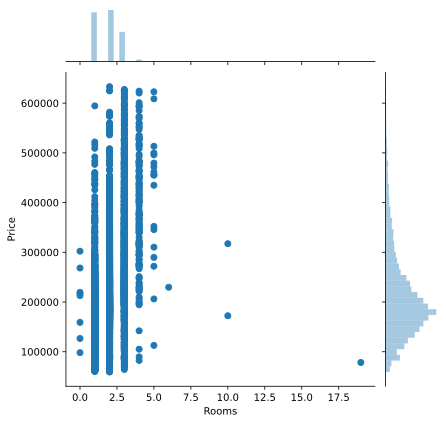

In [327]:
sns.jointplot(df['Rooms'], df['Price'], kind='scatter', height=6)

In [328]:
df['Rooms'].sort_values()

Id
770       0.0
3224      0.0
9443      0.0
7917      0.0
3159      0.0
         ... 
2879      5.0
14003     6.0
14865    10.0
5927     10.0
8491     19.0
Name: Rooms, Length: 10000, dtype: float64

In [329]:
dt['Rooms'].sort_values()

Id
3343      0.0
10729     0.0
7312      1.0
12406     1.0
3438      1.0
         ... 
6060      5.0
8638      5.0
4058      6.0
10793     6.0
1435     17.0
Name: Rooms, Length: 5000, dtype: float64

In [330]:
df.loc[(df['Rooms']>6), 'Rooms']=df['Rooms'].median()

In [331]:
dt.loc[(dt['Rooms']>6), 'Rooms']=dt['Rooms'].median()

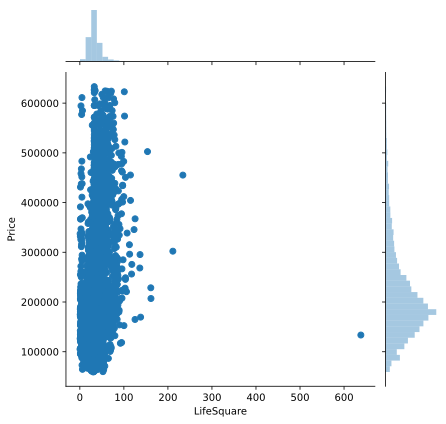

In [332]:
sns.jointplot(df['LifeSquare'], df['Price'], kind='scatter', height=6)

In [333]:
df.loc[(df['LifeSquare']>300), 'LifeSquare']=df['LifeSquare'].median()

In [334]:
df['LifeSquare'].sort_values()

Id
13491      0.370619
4378       0.641822
5112       0.795539
3224       0.873147
15402      1.049867
            ...    
14181    153.685835
15362    161.155275
5621     161.504222
7917     211.231125
5548     233.949309
Name: LifeSquare, Length: 10000, dtype: float64

In [335]:
dt['LifeSquare'].sort_values()

Id
6553       0.333490
6406       0.567267
3028       0.809265
13014      0.863989
14959      1.181139
            ...    
8638     115.328430
1397     118.055342
11500    118.667210
15096    122.578932
1686     136.921090
Name: LifeSquare, Length: 5000, dtype: float64

In [336]:
dt['Square'].sort_values()

Id
9011       1.378543
1165       2.372101
7855       4.967143
10120      5.100672
2138       5.647458
            ...    
3357     170.476326
13589    173.974480
7769     189.679576
1397     221.138768
4058     223.453689
Name: Square, Length: 5000, dtype: float64

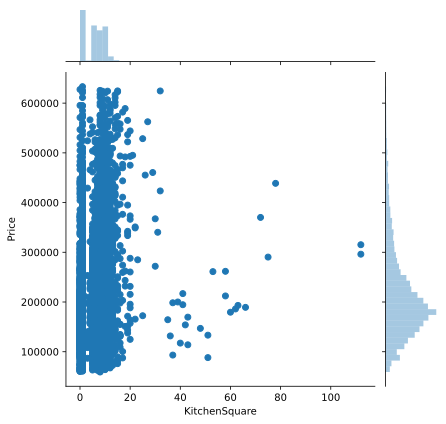

In [337]:
sns.jointplot(df['KitchenSquare'], df['Price'], kind='scatter', height=6)

In [338]:
df['KitchenSquare'].sort_values()

Id
5587       0.0
11014      0.0
3795       0.0
13884      0.0
16597      0.0
         ...  
16395     72.0
4966      75.0
12507     78.0
12552    112.0
7441     112.0
Name: KitchenSquare, Length: 10000, dtype: float64

In [339]:
dt['KitchenSquare'].sort_values()

Id
16515     0.0
5152      0.0
5099      0.0
6206      0.0
11296     0.0
         ... 
3747     42.0
12612    60.0
5428     61.0
8015     62.0
5260     65.0
Name: KitchenSquare, Length: 5000, dtype: float64

Разбиение данных на тренировочные и тестовые

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
X=df

In [379]:
y=df['Price']


In [380]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 24) (7000,)
(3000, 24) (3000,)


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
 18  A  

In [382]:
feature_num=['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'HouseYear',        
 'Helthcare_2',
 'Social_2', 'Social_3', 'Shops_1','Floor', 'Social_1',
 'Ecology_1']
feature_num

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'HouseYear',
 'Helthcare_2',
 'Social_2',
 'Social_3',
 'Shops_1',
 'Floor',
 'Social_1',
 'Ecology_1']

In [394]:
#from sklearn.preprocessing import StandardScaler

In [395]:
#scaler=StandardScaler()

In [396]:
#X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train[feature_num]), columns=feature_num, index=X_train.index)
#X_test_scaled=pd.DataFrame(scaler.transform(X_test[feature_num]), columns=feature_num, index=X_test.index)#

In [397]:
#X_train_scaled.describe()

Проверяем линейную регрессию

In [398]:
X_train.head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
14604          23    1.0   41.681380   22.796166            8.0     14   
5621           23    3.0  163.495333  161.504222           12.0      5   
235            87    1.0   39.710131   19.538663            8.0      4   
16258          48    3.0   52.513310   32.781260            1.0     15   
10773          77    3.0   79.195825   44.421062           10.0     16   

       HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Helthcare_2  Shops_1  \
Id                                                 ...                        
14604        17.0     2015.0   0.075779         B  ...           0        2   
5621          3.0     1977.0   0.014073         B  ...           0        0   
235          17.0     1986.0   0.100456         B  ...           1        6   
16258         1.0     2017.0   0.041125         B  ...           1       10   
10773        17.0     1984.0   0.298205         B  ...           1        3   

       Shops_2          Price  A  B  A  B  A  B  
Id                                               
14604        B   88504.384965  0  1  0  1  0  1  
5621         B  207007.956663  0  1  0  1  0  1  
235          A  182126.280899  0  1  0  1  1  0  
16258        B  524365.550705  0  1  0  1  0  1  
10773        B  322048.433990  0  1  0  1  0  1  

[5 rows x 24 columns]

In [399]:
feature_names=[ 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'HouseYear',  
 'Helthcare_2',
  'Social_2', 'Social_3', 'Shops_1','Floor', 'Social_1',
 'Ecology_1']

Построение модели линейной регрессии

In [400]:
from sklearn.linear_model import LinearRegression

In [401]:
lr=LinearRegression()

In [402]:
lr.fit(X_train[feature_names],y_train)

LinearRegression()

In [403]:
y_train_preds=lr.predict(X_train[feature_names])
y_test_preds=lr.predict(X_test[feature_names])


In [404]:
from sklearn.metrics import r2_score

In [405]:
r2_score(y_train,y_train_preds)

0.47889488033708516

In [406]:
r2_score(y_test,y_test_preds)

0.4505362981898676

Т.к. Показатель R2 получился 0.45 модель линейной регрессии плохо работает на этих данных

In [407]:
from sklearn.tree import DecisionTreeRegressor

In [408]:
dtr_model=DecisionTreeRegressor(random_state=42)

In [409]:
dtr_model.fit(X_train[feature_names],y_train)

DecisionTreeRegressor(random_state=42)

In [410]:
y_train_preds=dtr_model.predict(X_train[feature_names])
y_test_preds=dtr_model.predict(X_test[feature_names])

In [411]:
r2_score(y_train,y_train_preds)

0.9999915022232757

In [412]:
r2_score(y_test,y_test_preds)

0.4316861904853281

In [435]:
from sklearn.ensemble import RandomForestRegressor

In [436]:
regr=RandomForestRegressor(n_estimators=1000, max_depth =14, random_state=42)

In [437]:
regr.fit(X_train[feature_names],y_train)

RandomForestRegressor(max_depth=14, n_estimators=1000, random_state=42)

In [438]:
y_train_preds=regr.predict(X_train[feature_names])
y_test_preds=regr.predict(X_test[feature_names])

In [439]:
r2_score(y_train,y_train_preds)

0.9226745980273182

In [440]:
r2_score(y_test,y_test_preds)

0.7036572484861758

Важность признаков

In [441]:
importances=regr.feature_importances_

In [442]:
feat_importances=pd.Series(importances, index=feature_names)

In [443]:
feat_importances.sort_values(ascending=True, inplace=True)

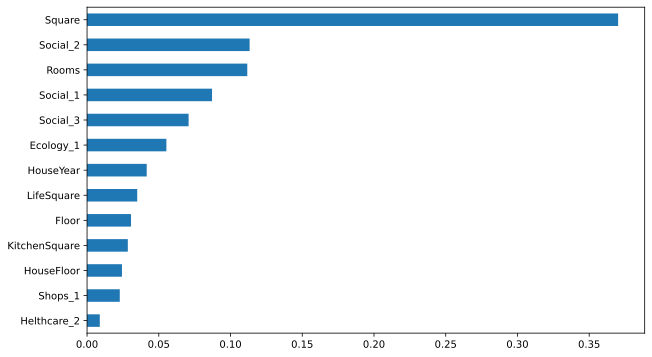

In [444]:
feat_importances.plot(kind='barh',figsize=(10,6))

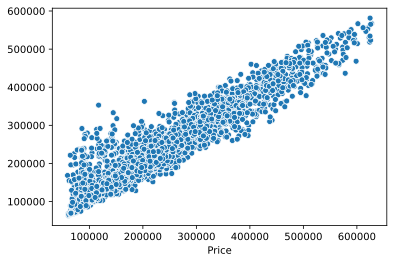

In [434]:
sns.scatterplot(x=y_train,y=y_train_preds)

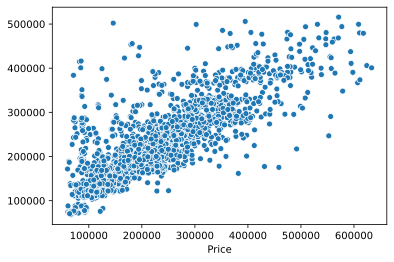

In [424]:
sns.scatterplot(x=y_test,y=y_test_preds)

In [445]:
X_train_own=pd.concat([X_train, X_test ])

In [446]:
X_test_own=dt[feature_names]

In [447]:
Y_pred=regr.predict(X_test_own)

In [448]:
preds=pd.DataFrame()

In [449]:
preds['Id']=X_test_own.index

In [450]:
preds['Price']=Y_pred
preds.head()

Id          Price
0    725  159572.452454
1  15856  211162.445140
2   5480  321572.518279
3  15664  354310.444123
4  14275  134282.091088

In [452]:
preds.shape

(5000, 2)

In [453]:
preds.to_csv('Titova_predictions.csv', index=False)